In [1]:
# First we need to import all the necessary/typical toolboxes...
from scipy.optimize import fsolve 
# import all the standard math functions and plotting stuff we'd want from numpy and matplotlib
from numpy import*
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline 

## Chapter 2 High Voltage Cable Example ##
Consider a high voltage wire (shown below) consisting of a core of copper wire surrounded by a thick layer of insulation. 

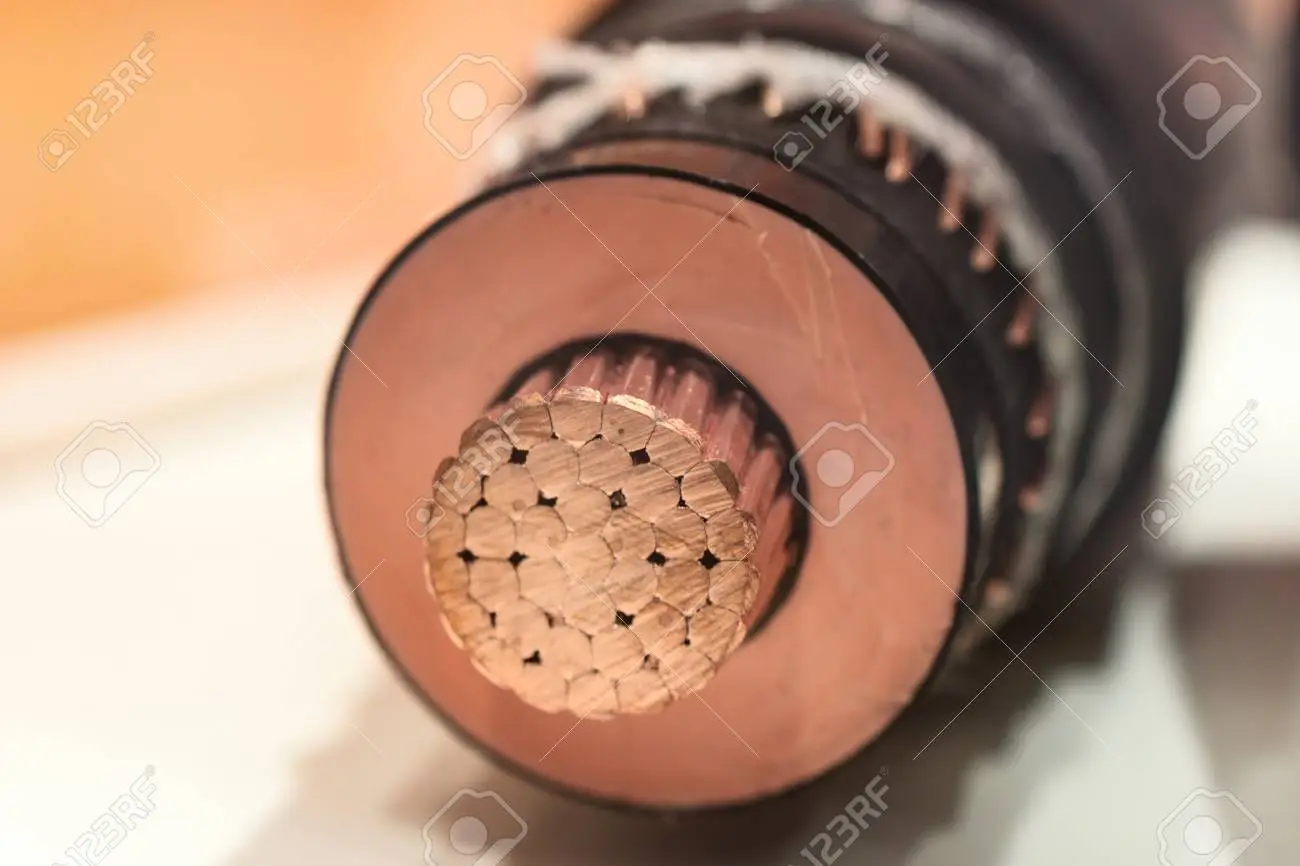

If 100 A of elctricity flows through the wire find the steady state radial temperature distribution assuming the following:
- The wire section has a diameter of 15 mm
- The insulation has athickness of 0.5 mm
- The wire has a resistance of 0.16x10$^{-3}$ $\frac{\Omega}{m}$
- The surrounding air temperature is 25$^o$C
- The free convection heat transfer coefficient is 5 W/m$^2$K

In [2]:
## Set your constants
r1 = 0.015*1 #[m] copper wire thickness
Rw = 0.16e-3 #[ohm/m] wire linear resitance per m
kc = 400*1 #[W/mK] copper thermal conductivity
r2 = r1 + 0.5e-3*1 #[m] insulation outer radius
ki = 1 #[W/mK] insulation thermal conductivity
#
h = 5 #[W/m2K] natural convection coeff
#
I = 100*1 #[A] current through wire
#
Tinf = 25 #[C] surrounding air temp

# Governing Equation
We need to solve for the radial temperature profile, so we'll need to solve the heat equation in cylindrical coordinates:

$
\frac{1}{r} \frac{\partial}{\partial r}\left(k r \frac{\partial T}{\partial r}\right) + \frac{1}{r^2} \frac{\partial}{\partial \phi}\left(k \frac{\partial T}{\partial \phi}\right) + \frac{\partial}{\partial z}\left(k \frac{\partial T}{\partial z}\right) + \dot{q} = \rho c \frac{\partial T}{\partial t}
$

...where the following simplifications can be made:
- In the first term on the LHS, the $k$ can come out of the derivative because it is constant.
- The 2nd and 3rd terms on the LHS go away due to no changese in the $\phi$ or $z$ directions. 
- The thermal generation term $\left(\dot{q}\right)$ is constant (at s.s. for a given current).
- The whole RHS goes away due to s.s. conditions.
Using these, the above equation simplifies to:

$
\frac{k}{r}\frac{\partial}{\partial r}\left(r\frac{\partial T}{\partial r}\right) = -\dot{q} = -\frac{q'}{\pi r^2}
$

This equation applies to the wire, but we'll need some boundary conditions to solve:

For the wire, we know that there is an adiabatic B.C. at the center (i.e., r = 0), but we don't have a B.C. value for where the wire meets the insulation. So we need to move on to the insulation.

$
\dot{q} \left[\frac{W}{m^3}\right] = \frac{I^2R}{\pi r^2_1 (1m)}
$

...and 

$
q' \left[\frac{W}{m}\right] = \dot{q} \frac{\pi r^2_1 L}{L}
$

In [3]:
qL = I**2*Rw #[W/m] heat transfer rate per unit length of wire
qD = I**2*Rw/(pi*r1**2*1)
print('The heat transfer out per unit length of wire, q\' is %.1f [W/m]' % qL)
print(f'The q_dot is {qD:.0f} W/m3')

The heat transfer out per unit length of wire, q' is 1.6 [W/m]
The q_dot is 2264 W/m3


## Insulation
For the insulation there is no $\dot{q}_{gen}$ term and so the heat equation for the insulation further redues to:

$
\frac{\partial}{\partial r}\left(r \frac{\partial T}{\partial r}\right) = 0
$

with the following B.C.:
#### B.C. at r2
At r = r2, $T(r)$ = $T_{i,2}$, which is the outer surface of the insulation and is further governed by the convective boundary condition:

$
q'_{cond} = q'_{conv} = h\left(2 \pi r_2\right) \left(T_{i,2} - T_\infty\right)
$

In [4]:
# Solve for the temp at the outer surface of the insulation, Ti,2
rr2 = linspace(r1,r2) # insulation space

Ti2 = Tinf + qL / (h*2*pi*r2) # insulation surface temp
Ti2K = Ti2 + 273 #[K]
print(f'Temp at outer radius (r2) = {Ti2:.3f} C = {Ti2K:.3f} K')

Temp at outer radius (r2) = 28.286 C = 301.286 K


#### B.C. at r1
At r = r1, we can apply Fourier's Law: $\frac{\partial T}{\partial r}|_{r_1}$ = $\frac{-q'}{2\pi r1 k_i}$

To do this we'll first need to integrate the following and then use the above B.C.

$
\frac{\partial}{\partial r}\left(r \frac{\partial T}{\partial r}\right) = 0  \quad ... \int{\rightarrow} ... \quad \frac{\partial T}{\partial r} = \frac{C_1}{r}
$

where the B.C. above applies at $r1$

$
\frac{\partial T}{\partial r}|_{r1} = \frac{C_1}{r_1} = \frac{q'}{2\pi r_1 k_i}
$

which can be sovled for C1

In [5]:
C1 = -qL/(2*pi*ki) #[C]
print(f'C1 = {C1:.3f} K')

C1 = -0.255 K


The above equation can now be fully integrated to solve for an equation of temperature:

$
\frac{\partial T}{\partial r}|_{r1} = \frac{C_1}{r_1} \quad ... \int{\rightarrow} ... \quad T(r) = C_1 \ln{r} + C_2
$

where at r2, the constant C2 is found: 

$
C_2 = T_{i,2} - C_1\ln{r_2}
$

...thus simplifying the temperature equation:

$
T(r)_{insulation} = C_1 \ln{\frac{r}{r_2}} + T_{i,2}
$

...allowing for the temperature at r1 to be found as well.

In [6]:
# Solve for the temp profile within the insulation
T2 = C1*log(rr2/r2) + Ti2 # Temp distribution in the insulation
Ti1 = C1*log(r1/r2)+Ti2 #[C]
Ti1K = Ti1 + 273 #[K]
print(f'Temp at r1 = {Ti1:.3f} C = {Ti1K:.3f} K')

Temp at r1 = 28.294 C = 301.294 K


## Cable
Now we can go back and solve for the temperature distribution in the cable:

$
\frac{\partial}{\partial r}\left(r\frac{\partial T}{\partial r}\right) = -\frac{r\dot{q}}{k_{cable}} \quad ... \int{\rightarrow} ... \quad r\frac{\partial T}{\partial r} = -\frac{\dot{q}}{2k_c}r^2 + C_3
$

#### Boundary Conditions:
- At r = 0, adiabatic: $\frac{\partial T}{\partial r} = 0$
- At r = r1, T = T(r1) from above

The first B.C. makes C3 = 0 leaving the following for the temperature equation in the wire:

$
T(r) = -\frac{\dot{q}{4k_c}}r^2 + C_4
$

where C4 can be solved at r = r1, $C_4 = T(r1) + \frac{\dot{q}r^2_1}{4 k_c}$

In [7]:
C4 = Ti1 + qD*r1**2/(4*kc)
print(f'C4 = {C4:.3f} C')

C4 = 28.294 C


...yielding the final temperature profile in the wire:

$
T(r)_{cable} = \frac{\dot{q}}{4 k_c}\left(r_1^2 - r^2 \right) + T(r_1)
$

In [8]:
# Solving for the temp profile in the cable
rr1 = linspace(0,r1) #cable space

T1 = qD/(4*kc)*(r1**2 - rr1**2) + Ti1 # Temp distribution in the cable

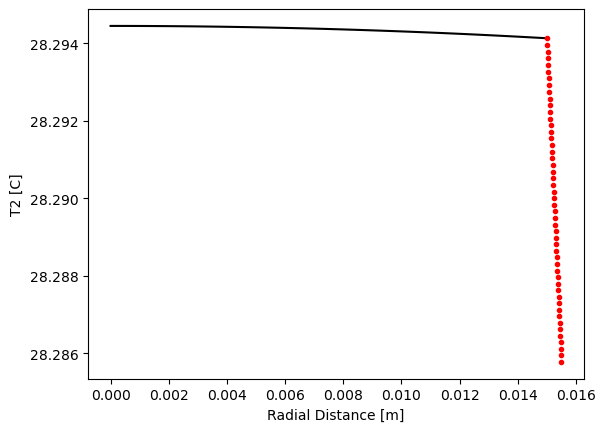

In [9]:
# Plotting the data
fig, ax1 = plt.subplots()
#
ax1.plot(rr1,T1, 'k')
ax1.plot(rr2,T2, '.r')
#
ax1.set_xlabel('Radial Distance [m]')
ax1.set_ylabel('T2 [C]')
#ax1.set_ylim(25, 26)
plt.show()

Q: what happens if we increase the thickness or material of the wire? thickness of the insulation? the power through the cable?

Ex. try the following:
- kc*.01
- r2 = r1 + 0.5e-3*100
- I*10